# Visualizations for Topic Models with *tmtoolkit*

This uses a topic model generated from a tiny subset of the Reuters data included in the [lda package](http://pythonhosted.org/lda/).

**Please note that this is a really tiny corpus in order to make this example more managable and faster to process. The results are not representative for the whole corpus though!** 

In [1]:
# load complete model
import six   # for loading the right model according to the Python version
from tmtoolkit import lda_utils

py3suffix = '.py3' if six.PY3 else ''
data = lda_utils.common.load_ldamodel_from_pickle('data/tiny_model_reuters_5_topics%s.pickle' % py3suffix)

model = data['model']
vocab = data['vocab']
doc_labels = data ['doc_labels']

n_docs, n_topics = model.doc_topic_.shape
vocab_size = len(vocab)

print('model with %d topics learnt from %d documents with vocabulary size of %d unique words'
      % (n_topics, n_docs, vocab_size))

model with 5 topics learnt from 10 documents with vocabulary size of 1113 unique words


In [2]:
# some options for wordcloud output
img_w = 400   # image width
img_h = 300   # image height

## Topics as Word Clouds

In [3]:
topic_clouds = lda_utils.visualize.generate_wordclouds_for_topic_words(model.topic_word_,
                                                                       vocab,
                                                                       top_n=20,
                                                                       width=img_w,
                                                                       height=img_h)
topic_clouds.keys()

['topic_5', 'topic_4', 'topic_3', 'topic_2', 'topic_1']

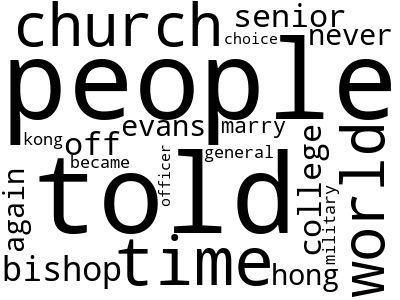

In [4]:
topic_clouds['topic_1']

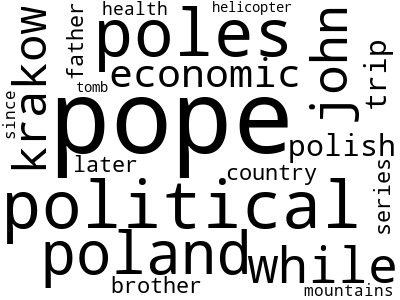

In [5]:
topic_clouds['topic_3']

## Document-topic clouds

In [6]:
doc_clouds = lda_utils.visualize.generate_wordclouds_for_document_topics(model.doc_topic_,
                                                                         doc_labels,
                                                                         top_n=5,
                                                                         width=img_w,
                                                                         height=img_h)
doc_clouds.keys()

[u"152 UK: FEATURE - Duke's reputation sinks 60 years after abdication. LONDON 1996-12-11",
 u'140 UK: Papers show Duke of Windsor was royal loose cannon. LONDON 1996-12-03',
 u"337 POLAND: Pope spends moments of silence at parents' grave. KRAKOW, Poland 1997-06-09",
 u'73 UK: Runaway Scottish bishop to marry lover. GLASGOW, Scotland 1996-10-08',
 u"293 UK: China's HK General perfect choice, says tutor. LONDON 1997-04-22",
 u"2 INDIA: Mother Teresa's condition said still unstable. CALCUTTA 1996-08-23",
 u'163 ISRAEL: Israel takes shine off Christmas in Bethlehem. BETHLEHEM, West Bank 1996-12-23',
 u'168 UK: Britain to review law after Fred West film plan. LONDON 1997-01-01',
 u'330 POLAND: Pope takes helicopter trip over beloved mountains. ZAKOPANE, Poland 1997-06-05',
 u'248 INDIA: Mother Teresa successor vote soon - church official. CALCUTTA 1997-03-04']

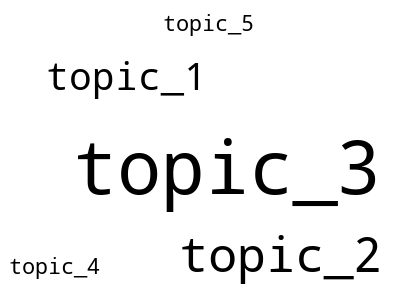

In [7]:
doc_clouds['330 POLAND: Pope takes helicopter trip over beloved mountains. ZAKOPANE, Poland 1997-06-05']

## Saving wordclouds as files

In [8]:
import os

output_dir = '/tmp/wordclouds_nbtest'
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

lda_utils.visualize.write_wordclouds_to_folder(topic_clouds, output_dir)

print('files were saved to directory: %s' % output_dir)

files were saved to directory: /tmp/wordclouds_nbtest


## Document-topic distribution as heatmap

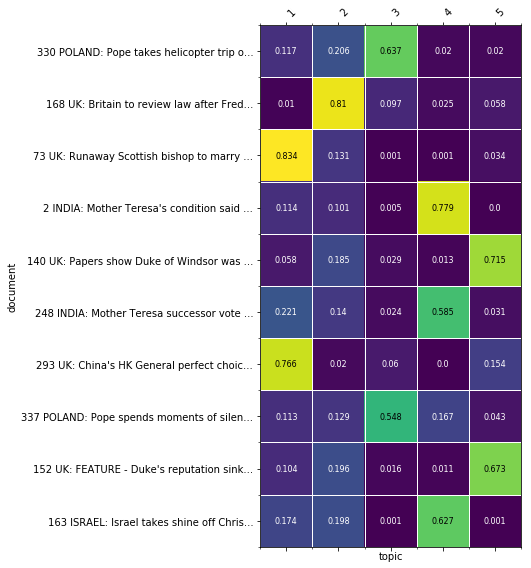

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))  # create a figure to draw on

# the document labels are quite large so let's shorten them
doc_labels_abbrev = [dl[:40] + '...' for dl in doc_labels]

# generate the plot
lda_utils.visualize.plot_doc_topic_heatmap(fig, ax, model.doc_topic_, doc_labels_abbrev,
                                           round_values_in_cells=3,   # round to 3 digits after point
                                           fontsize_cell_values=8)    # set smaller font size in cells

plt.tight_layout()  # make sure the tick and axes labels are correctly displayed
fig

Usually, you will have much more documents and/or topics so you will need to select a subset of documents and/or topics. You can do that with the `which_documents` and `which_topics` parameters:

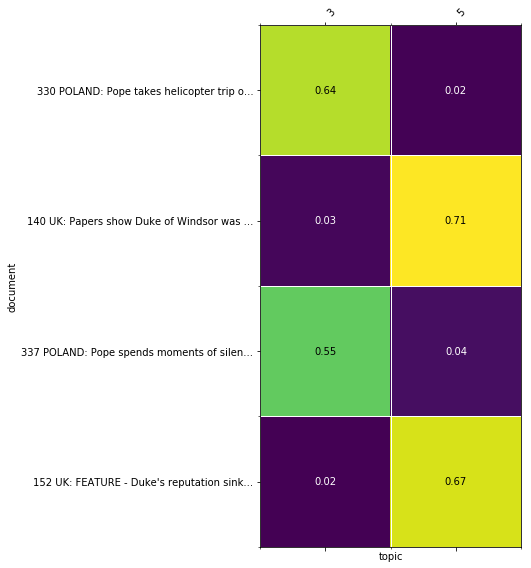

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))  # create a figure to draw on

# the document labels must match the ones in doc_labels_abbrev
which_docs = (
    '330 POLAND: Pope takes helicopter trip o...',
    '337 POLAND: Pope spends moments of silen...',
    '140 UK: Papers show Duke of Windsor was ...',
    "152 UK: FEATURE - Duke's reputation sink..."
)

lda_utils.visualize.plot_doc_topic_heatmap(fig, ax, model.doc_topic_, doc_labels_abbrev,
                                           which_documents=which_docs,  # select the documents
                                           which_topics=(3, 5))   # select topics 3 and 5

plt.tight_layout()
fig

The same is possible with the topic-word distribution. Here again, as the vocabulary of your data is probably very large, it does not make sense to plot the heatmap of the whole distribution, so you should select some of the words with `which_words`.

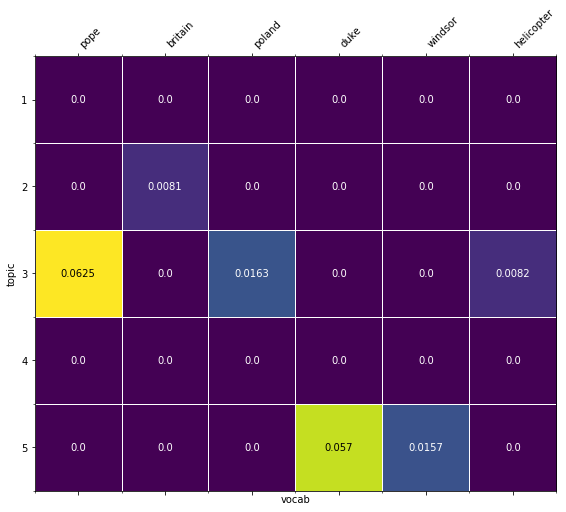

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))  # create a figure to draw on

# the document labels must match the ones in doc_labels_abbrev
which_words = (
    'poland',
    'pope',
    'helicopter',
    'britain',
    'duke',
    'windsor'
)

lda_utils.visualize.plot_topic_word_heatmap(fig, ax, model.topic_word_, vocab,
                                            which_words=which_words,  # select the documents
                                            round_values_in_cells=4)

plt.tight_layout()
fig